<a href="https://colab.research.google.com/github/AnveshAnnepaga/AI_DS/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder
#handle missing values
df.dropna(inplace = True)

#encode categorical variables
label_encoder = {}
for col in df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoder[col] = le

In [ ]:
x=df.drop(columns=['target'])
y=df['target']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)Q
y_pred = svm_linear.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8146341463414634

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[72, 30],
       [ 8, 95]])

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='poly',degree =3,C=1)
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 0.9073170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       102
           1       0.86      0.98      0.91       103

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



array([[ 85,  17],
       [  2, 101]])

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='rbf',C=1,gamma ='scale')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 0.8878048780487805

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



array([[85, 17],
       [ 6, 97]])

# Business Scenario(dataset = Loan Prediction Problem Dataset)

A fintech company provides instant personal loans through a mobile application.
To reduce risk, the company wants an AI-based decision system that predicts whether a loan should be Approved or Rejected.
Challenges:
Customer data is not linearly separable
Simple linear rules fail
Decision boundaries may be curved or complex
The solution must be interactive and deployable
You are hired as a Machine Learning Engineer to build and deploy this system

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

/tmp/ipython-input-2801037947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
/tmp/ipython-input-2801037947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


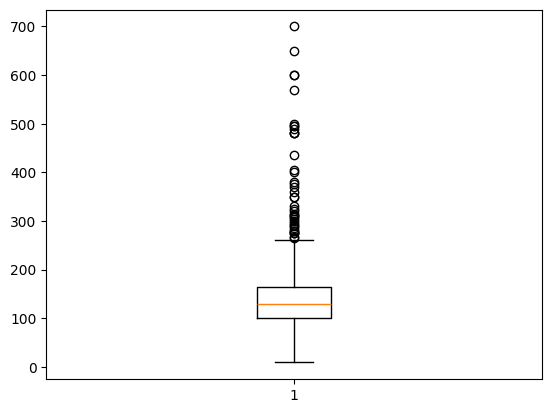

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['LoanAmount'])
plt.show()

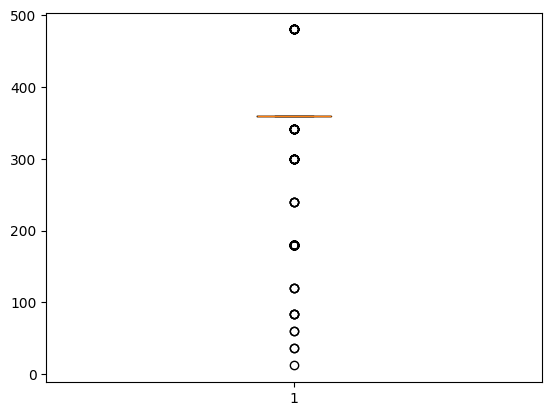

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['Loan_Amount_Term'])
plt.show()

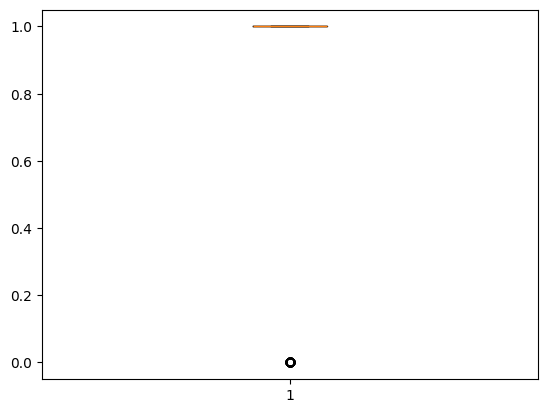

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['Credit_History'])
plt.show()

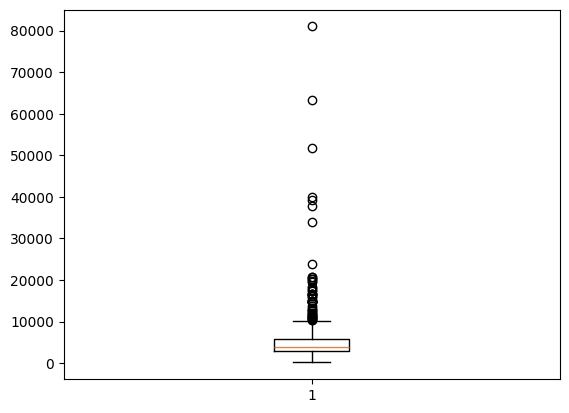

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['ApplicantIncome'])
plt.show()

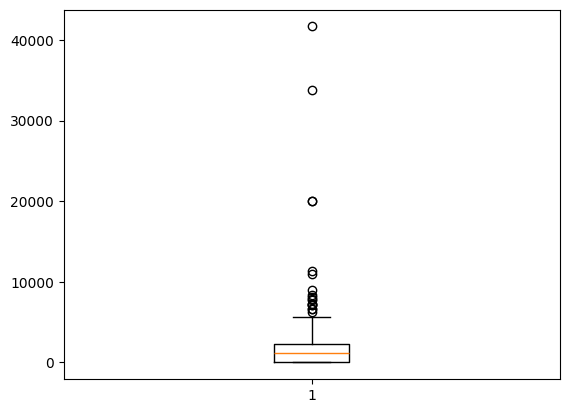

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
# we are using log transformation to handle outliers
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341510,4.290129,4.870872,5.805381,0.855049
std,0.645035,3.875873,0.491376,0.309569,0.352339
min,5.017280,0.000000,2.302585,2.564949,0.000000
25%,7.965024,0.000000,4.617584,5.888878,1.000000
50%,8.246303,7.081125,4.867534,5.888878,1.000000
75%,8.664922,7.739897,5.110477,5.888878,1.000000
max,11.302217,10.637489,6.552508,6.175867,1.000000


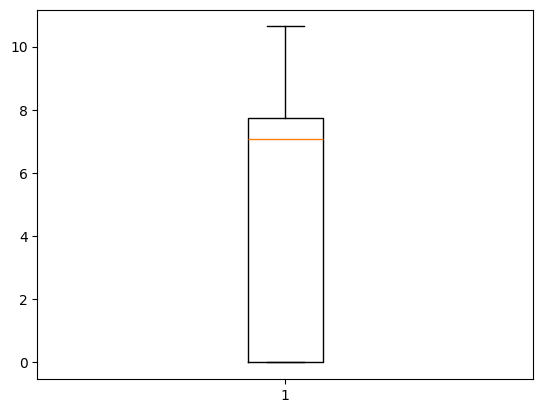

In [ ]:
#outliers
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
df[[
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History"
]].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.368258,0.492560,-0.014723,0.013482
CoapplicantIncome,-0.368258,1.000000,0.130524,0.012895,0.008274
LoanAmount,0.492560,0.130524,1.000000,0.084301,-0.019208
Loan_Amount_Term,-0.014723,0.012895,0.084301,1.000000,-0.012312
Credit_History,0.013482,0.008274,-0.019208,-0.012312,1.000000


In [ ]:
x=df.drop(columns=['Loan_Status','Loan_ID'])
y=df['Loan_Status']

In [ ]:
#encode categorical variables
label_encoder = {}
for col in df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoder[col] = le

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", acc_linear)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



array([[18, 25],
       [ 1, 79]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
svm_linear = SVC(kernel='poly',degree = 3, C=1)
svm_linear.fit(x_train, y_train)
y_pred_poly = svm_linear.predict(x_test)
acc_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy:",acc_poly)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



array([[18, 25],
       [ 1, 79]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm_linear = SVC(kernel='rbf',C=1,gamma ='scale')
svm_linear.fit(x_train, y_train)
y_pred_rbf = svm_linear.predict(x_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", acc_rbf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



array([[18, 25],
       [ 1, 79]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def evaluate_model(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

results = {
    "Linear SVM": evaluate_model(y_test, y_pred_linear),
    "Polynomial SVM": evaluate_model(y_test, y_pred_poly),
    "RBF SVM": evaluate_model(y_test, y_pred_rbf)
}

results


{'Linear SVM': {'Accuracy': 0.7886178861788617,
  'Precision': 0.7596153846153846,
  'Recall': 0.9875},
 'Polynomial SVM': {'Accuracy': 0.7804878048780488,
  'Precision': 0.7572815533980582,
  'Recall': 0.975},
 'RBF SVM': {'Accuracy': 0.7886178861788617,
  'Precision': 0.7596153846153846,
  'Recall': 0.9875}}

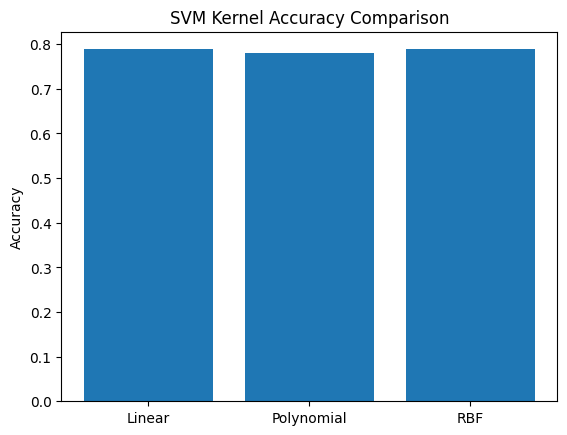

In [ ]:
import matplotlib.pyplot as plt

kernels = ["Linear", "Polynomial", "RBF"]
accuracies = [acc_linear, acc_poly, acc_rbf]

plt.figure()
plt.bar(kernels, accuracies)
plt.ylabel("Accuracy")
plt.title("SVM Kernel Accuracy Comparison")
plt.show()


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision (Approved loans are actually safe):", precision)


Precision (Approved loans are actually safe): 0.7596153846153846


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall (Eligible customers correctly approved):", recall)


Recall (Eligible customers correctly approved): 0.9875


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_linear)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))


Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

